In [1]:
pip install --upgrade matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import Libraries and Models

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs

In [3]:
#Open File
df=pd.read_csv("Pred_Ast_Diam_2.csv")
#Set every column as a data type


"""
-diameter: This is the target variable for this project. It is in km for the unit.
-orbit_id: Orbital solution ID
-e: Eccentricity of the orbit
-a: Semi-Major Axis in units (AU)
-i: Inclination; angle with respect to x-y ecliptic plane (deg)
-om: Longitude of the ascending Node (deg)
-w: Argument of Perihelion (deg)
-ma: Mean anomly (deg)
-n: Mean Motion (deg/d)
-tp: Time of perihelion passage
-moid: Earth minimum orbit intersection distance (au)
-moid_jup: Jupiter minimum orbit intersection distance (au)
-class: Orbit Classification
-producer: Name of Person (or Institution) Who Computed the Orbit
-data_arc: Number of days spanned by the data-arc (days)
-n_obs_used: Number of observations used in the orbit fit (all types)
-rms: Normalized Root Mean Square of orbit fit (arcsec)
-albedo: Geometric albedo
-first_year_obs: The year of the first observation
-first_month_obs: The month of the first observation
-last_year_obs: The year of the last observation
-last_month_obs: The month of the last observation
"""
data=df

In [4]:
data.head(25)

,orbit_id,e,a,i,om,w,ma,n,tp,moid,...,data_arc,n_obs_used,rms,diameter,albedo,diameter_sigma,first_year_obs,first_month_obs,last_obs_year,last_obs_month
0,JPL 35,0.242027,2.201791,2.536221,313.311389,18.989048,301.072249,0.301675,2.458796e+06,0.657747,...,46399.0,2611,0.46222,9.300,0.2082,0.800,1892,10,2019,10
1,JPL 25,0.256856,2.338209,22.326589,10.489602,105.115594,87.454449,0.275663,2.458283e+06,0.875501,...,38117.0,1528,0.38116,9.822,0.3140,0.130,1915,4,2019,8
2,JPL 28,0.160543,2.228812,1.747387,121.579382,252.465454,208.942016,0.296206,2.459110e+06,0.871683,...,36040.0,2357,0.44671,8.196,0.3790,0.100,1920,9,2019,5
3,JPL 35,0.167945,2.241299,2.428619,161.636895,172.846491,20.350289,0.293734,2.458531e+06,0.854020,...,33289.0,2574,0.43691,6.534,0.2170,0.068,1928,10,2019,11
4,JPL 34,0.253295,2.467536,6.757106,137.130656,259.158793,127.366908,0.254278,2.458100e+06,0.862972,...,39907.0,2523,0.44695,9.111,0.2560,0.303,1910,2,2019,5
5,JPL 67,0.073742,1.944104,22.508840,175.320955,124.031963,224.445860,0.363601,2.458973e+06,0.833343,...,44070.0,2492,0.37174,8.934,0.7260,0.748,1898,9,2019,5
6,JPL 34,0.103066,2.244712,5.995089,203.399440,264.392525,244.456912,0.293064,2.458995e+06,1.040690,...,40578.0,2484,0.43574,9.326,0.2210,0.239,1908,10,2019,11
7,JPL 29,0.110058,2.230630,5.389819,72.373045,354.339267,127.022318,0.295844,2.458171e+06,0.998781,...,41871.0,2440,0.39707,9.010,0.2870,0.099,1904,12,2019,8
8,JPL 29,0.239092,2.253449,5.680974,336.764958,76.779174,181.329773,0.291362,2.459214e+06,0.736039,...,41608.0,1810,0.40250,8.456,0.2980,0.031,1905,9,2019,8
9,JPL 33,0.353074,2.628043,32.583941,155.112383,76.773043,169.922720,0.231342,2.457866e+06,0.923279,...,41518.0,1834,0.40240,9.230,0.3255,0.900,1906,3,2019,11


In [5]:
# Get an idea of the different means, distributions, and values associated with the features
data.describe()

,e,a,i,om,w,ma,n,tp,moid,moid_jup,data_arc,n_obs_used,rms,diameter,albedo,diameter_sigma,first_year_obs,first_month_obs,last_obs_year,last_obs_month
count,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000,1.264970e+05,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000
mean,0.146644,2.756965,10.203665,169.819406,181.823887,182.532163,0.223042,2.458473e+06,1.372152,2.103674,8327.433417,619.322261,0.556354,4.162426,0.133238,0.459791,1995.518985,6.819292,2018.317351,6.839364
std,0.076841,0.453027,6.689924,102.749965,103.538522,103.416049,0.054299,8.544471e+02,0.381999,0.401889,4652.967177,518.067224,0.091134,1.933024,0.112034,0.404647,11.947776,3.534653,2.010448,3.590190
min,0.000488,0.626226,0.021855,0.000929,0.004466,0.000517,0.001698,2.451624e+06,0.000166,0.005081,1.000000,5.000000,0.054414,0.008000,0.001000,0.001000,1892.000000,1.000000,2000.000000,1.000000
25%,0.091182,2.510297,5.051481,82.100534,91.822257,93.746347,0.182872,2.458154e+06,1.068410,1.837530,6295.000000,217.000000,0.520510,2.701000,0.053000,0.183000,1993.000000,3.000000,2019.000000,4.000000
50%,0.140047,2.729370,9.244113,160.539684,183.660501,185.542573,0.218580,2.458589e+06,1.353690,2.112610,7527.000000,471.000000,0.554530,3.787000,0.080000,0.337000,1998.000000,8.000000,2019.000000,6.000000
75%,0.192297,3.074005,13.538838,256.258893,271.540490,270.957509,0.247809,2.459022e+06,1.672490,2.385130,9425.000000,901.000000,0.589510,5.265000,0.196000,0.617000,2001.000000,10.000000,2019.000000,11.000000
max,0.968381,69.576833,158.535394,359.990858,359.995174,359.999226,1.988877,2.461586e+06,4.035760,4.419670,46399.000000,4611.000000,8.632100,10.240000,1.000000,22.277000,2014.000000,12.000000,2019.000000,12.000000


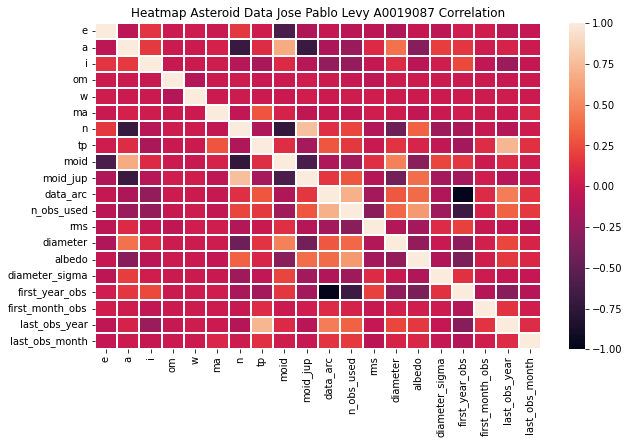

In [6]:
#Find correlation between the variables

corr= data.corr(method= "pearson") 
plt.figure(figsize=(10,6))
ax1 = sns.heatmap(corr, cbar=2, linewidths=2 ,vmax=1, vmin=-1)

plt.title("Heatmap Asteroid Data Jose Pablo Levy A0019087 Correlation")
plt.show()

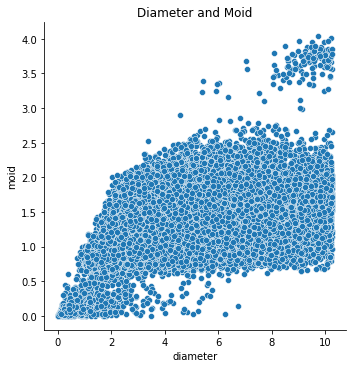

In [7]:
sns.relplot(x ="diameter", y ="moid",
            data = df).set(title='Diameter and Moid');

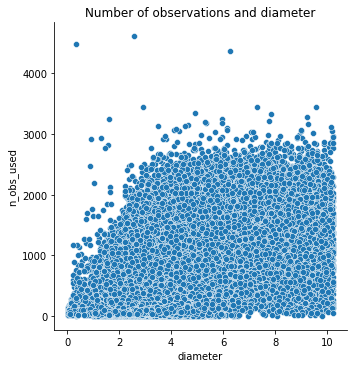

In [8]:
sns.relplot(x ="diameter", y ="n_obs_used",
            data = df).set(title='Number of observations and diameter');

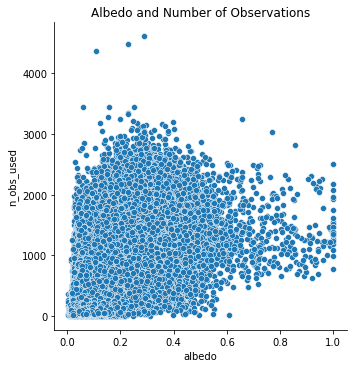

In [9]:
sns.relplot(x ="albedo", y ="n_obs_used",
            data = df).set(title='Albedo and Number of Observations');

In [10]:
# Split into Train and Test sets
train, test = train_test_split(data, train_size=.80, test_size=0.20, random_state=42)

# Split train into train & val
train, val = train_test_split(train, train_size=0.80, test_size=0.20, random_state=42)

# Declare Variables
X = features = train.columns.drop('diameter')
Y = ['diameter']

In [11]:
#Arrange data into X feautures matrix and y target vector for the diferent setc
X_train = train[X]
y_train = train[Y]

X_val = val[X]
y_val= val[Y]

X_test = test[X]
y_test= test[Y]


In [12]:
import category_encoders as ce
#Encode string type columns 
ord_encoder = ce.OrdinalEncoder(cols = ['orbit_id'])
X_train_ordencoded = ord_encoder.fit_transform(X_train)
X_val_ordencoded = ord_encoder.transform(X_val)
X_test_ordencoded = ord_encoder.transform(X_test)

oh_encoder = ce.OneHotEncoder(use_cat_names=True, cols=['class','producer'])
X_train_encoded = oh_encoder.fit_transform(X_train_ordencoded)
X_val_encoded = oh_encoder.transform(X_val_ordencoded)
X_test_encoded = oh_encoder.transform(X_test_ordencoded)

In [13]:
# Get an individual observation to test everything is working correctly.
# The 0th row from the test set will be use to compare predictions.
trying = X_test_encoded.iloc[[0]]
trying

,orbit_id,e,a,i,om,w,ma,n,tp,moid,...,producer_Ryan S. Park,data_arc,n_obs_used,rms,albedo,diameter_sigma,first_year_obs,first_month_obs,last_obs_year,last_obs_month
119557,9.0,0.066676,2.720769,18.546595,31.706207,44.838379,40.049634,0.219617,2.455096e+06,1.57365,...,0,1.0,10,0.78823,0.088,0.341,2010,3,2010,3


In [14]:
y_test.iloc[[0]]

,diameter
119557,2.242


In [15]:
#----------------------Random Forest Regressor------------------------------ 
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [16]:
#Set matrices and variables for RFR
scaler=StandardScaler()
scaler.fit(X_train_encoded)
scaler.fit(X_val_encoded)
scaler.fit(X_test_encoded)

rfr_shap=RandomForestRegressor(n_estimators=450,
                                max_features=0.77,
                                max_depth= None,
                                min_samples_leaf=3,
                                min_samples_split=3,
                                n_jobs=-1,
                                random_state=42)
rfr_shap.fit(X_train_encoded, y_train)

C:\Users\josep\AppData\Local\Temp/ipykernel_23128/765836718.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_shap.fit(X_train_encoded, y_train)


RandomForestRegressor(max_features=0.77, min_samples_leaf=3,
                      min_samples_split=3, n_estimators=450, n_jobs=-1,
                      random_state=42)

In [17]:
#Predict diameter in "trying"
rfr_shap.predict(trying)

array([2.32965635])

In [18]:
#Predic in train a validation dataset
y_pred_train=rfr_shap.predict(X_train_encoded)
y_pred_val = rfr_shap.predict(X_val_encoded)

In [19]:
#Print performance metric
print(f'---------------------Training Data------------')
print('- Training R^2 value', rfr_shap.score(X_train_encoded, y_train))
print(f'- Training MAE', mean_absolute_error(y_train,y_pred_train),' km (standardized)')
print(f'- Training MSE', mean_squared_error(y_train,y_pred_train), 'km (standardized)')
print(f'---------------------Validation Data------------')
print('- Validation R^2 value', rfr_shap.score(X_val_encoded, y_val))
print(f'- Validation MAE', mean_absolute_error(y_val,y_pred_val),'km (standardized)')
print(f'- Validation MSE',mean_squared_error(y_val,y_pred_val), 'km (standardized)')

---------------------Training Data------------
- Training R^2 value 0.9765558677859618
- Training MAE 0.20067538584765635  km (standardized)
- Training MSE 0.0877105992420692 km (standardized)
---------------------Validation Data------------
- Validation R^2 value 0.9091544604797346
- Validation MAE 0.4128421435584428 km (standardized)
- Validation MSE 0.3390760969315079 km (standardized)


In [20]:
import shap

explainer = shap.TreeExplainer(rfr_shap)
shap_values = explainer.shap_values(trying)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=trying
)

In [21]:
def explain(row_number):

    # Get & process the data for the row
    row = X_test_encoded.loc[[row_number]]
    
    # Make predictions (includes predicted probability)
    pred = rfr_shap.predict(row)[0]

    # Show predictiion & probability
    print(f'The model predicts asteroids diameter {pred} km.')
    
    #Shapley  explanations
    shap_values = explainer.shap_values(row)

    # Top 3 "pros & cons"
    feature_names = row.columns
    feature_values = row.values[0] #returns list of list
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values, shap_values[0]))
    #shaps = pd.Series(shap_values[0], zip(zip(feature_names, feature_values), shap_values[0]))
    
     #create argument for top 3 and bottom 3 as pros and cons
    pros = shaps.sort_values(ascending=False)[:3].index
    cons = shaps.sort_values(ascending=True)[:3].index

    # Show top 3 reason for prediction
    print('\n')
    print('-----------Top 3 Features Increasing Diameter Prediction----------')
    evidence = pros # blue postive
    for i, info in enumerate(evidence, start=1):
        feature_name, feature_value, shap_value = info
        print(f'{i}. {feature_name} increases diameter prediction by {shap_value} km.')

    # Show top 3 counter-argument against prediction
    print('\n')
    print('-----------Top 3 Features Decreasing Diameter Prediction----------')
    evidence = cons # red
    for a, info in enumerate(evidence, start=1):
        feature_name, feature_value, shap_value = info
        print(f'{a}. {feature_name} decreases diameter prediction by {shap_value} km.')

    # Show Shapley Values Force Plot
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value, 
        shap_values=shap_values, 
        features=row, 
    )
  
explain(1202)

The model predicts asteroids diameter 5.01525958983609 km.


-----------Top 3 Features Increasing Diameter Prediction----------
1. n_obs_used increases diameter prediction by 2.489023522786949 km.
2. diameter_sigma increases diameter prediction by 0.11532123254636541 km.
3. rms increases diameter prediction by 0.10978454642000605 km.


-----------Top 3 Features Decreasing Diameter Prediction----------
1. a decreases diameter prediction by -0.6274793616743647 km.
2. n decreases diameter prediction by -0.5956391982808054 km.
3. albedo decreases diameter prediction by -0.49146738050792704 km.


In [22]:
#----------------------Logistic Regression------------------------------------------
# Import logisitc regression Model
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression as lr

classifier = lr()

# Arrange X features matrices (already did y target vectors)
featurelr = ['n_obs_used']
X_train = train[featurelr]
X_val = val[featurelr]
X_test = test[featurelr]

print(f'Linear Regression, dependent on {featurelr}:')

Linear Regression, dependent on ['n_obs_used']:


In [23]:
#Apply moodel to train data and get specs
classifier.fit(X_train, y_train)

#Get predicitons
y_pred_t = classifier.predict(X_train)
y_pred_v = classifier.predict(X_val)

#Get performance metrics
mae_t = mean_absolute_error(y_train, y_pred_t)
mse_t = mean_squared_error(y_train, y_pred_t)
r2_t = r2_score(y_train, y_pred_t)
print(f'---------------------Training Data------------')
print(f'Training MAE Error: {mae_t:.2f} km standarized')
print(f'Training MSE Error: {mse_t:.2f} km standarized')
print(f'Training R^2 Error: {r2_t:.4f}')

# Apply the model to validation data
mae_v = mean_absolute_error(y_val, y_pred_v)
mse_v = mean_squared_error(y_val, y_pred_v)
r2_val = r2_score(y_val, y_pred_v)
print(f'---------------------Validation Data------------')
print(f'Validation MAE Error: {mae_v:.2f} km standarized ')
print(f'Validation MSE Error: {mse_v:.2f} km standarized')
print(f'Validation R^2 Error: {r2_val:.4f}')


---------------------Training Data------------
Training MAE Error: 1.45 km standarized
Training MSE Error: 3.26 km standarized
Training R^2 Error: 0.1281
---------------------Validation Data------------
Validation MAE Error: 1.45 km standarized 
Validation MSE Error: 3.22 km standarized
Validation R^2 Error: 0.1363


In [24]:
#-------------------DECISION TREE--------------------------------------

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

dtr_shap = DecisionTreeRegressor(criterion='mse', max_depth=15, min_samples_leaf=15, min_samples_split=4, random_state=42)
dtr_shap.fit(X_train_encoded,y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=15, min_samples_split=4,
                      random_state=42)

In [25]:
#predict diameter of "trying" using DTR
dtr_shap.predict(trying)

array([2.28152941])

In [26]:
#Predict both in train and in validation
y_pred_train=dtr_shap.predict(X_train_encoded)
y_pred_val = dtr_shap.predict(X_val_encoded)

In [27]:
#Print performance metric
print(f'---------------------Training Data------------')
print('- Training R^2 value', dtr_shap.score(X_train_encoded, y_train))
print(f'- Training MAE', mean_absolute_error(y_train,y_pred_train),' km (standardized)')
print(f'- Training MSE', mean_squared_error(y_train,y_pred_train), 'km (standardized)')
print(f'---------------------Validation Data------------')
print('- Validation R^2 value', dtr_shap.score(X_val_encoded, y_val))
print(f'- Validation MAE', mean_absolute_error(y_val,y_pred_val),'km (standardized)')
print(f'- Validation MSE',mean_squared_error(y_val,y_pred_val), 'km (standardized)')

---------------------Training Data------------
- Training R^2 value 0.9172708265387185
- Training MAE 0.39857440623263973  km (standardized)
- Training MSE 0.3095113656945306 km (standardized)
---------------------Validation Data------------
- Validation R^2 value 0.8549940960102531
- Validation MAE 0.5261607418264046 km (standardized)
- Validation MSE 0.5412267483523522 km (standardized)


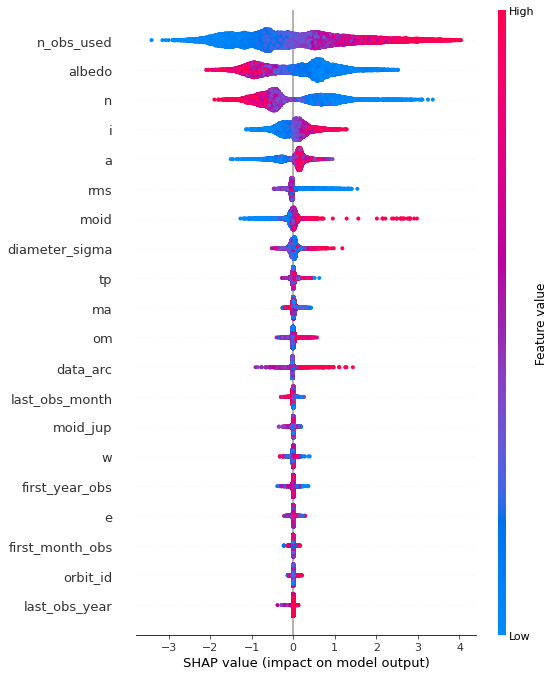

In [28]:
#Plot to understand the effects of features in decision tree
explainer = shap.TreeExplainer(dtr_shap)
shap_values = explainer.shap_values(X_test_encoded)
shap.summary_plot(shap_values, X_test_encoded)